In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../realtor-data.csv')

In [3]:
df.shape

(1048575, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1047537 non-null  float64
 1   status          1048575 non-null  object 
 2   price           1047485 non-null  float64
 3   bed             738569 non-null   float64
 4   bath            723607 non-null   float64
 5   acre_lot        870247 non-null   float64
 6   street          1041799 non-null  float64
 7   city            1047715 non-null  object 
 8   state           1048568 non-null  object 
 9   zip_code        1048416 non-null  float64
 10  house_size      683689 non-null   float64
 11  prev_sold_date  497886 non-null   object 
dtypes: float64(8), object(4)
memory usage: 96.0+ MB


In [5]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.047537e+06,1.047485e+06,738569.000000,723607.000000,870247.000000,1.041799e+06,1.048416e+06,6.836890e+05
mean,5.187727e+04,4.774979e+05,3.309546,2.536147,15.345766,1.055064e+06,3.790441e+04,2.137796e+03
std,3.039121e+04,2.774217e+06,1.598269,1.675857,747.421182,6.057396e+05,1.965920e+04,1.249966e+04
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,3.000000e+00,0.000000e+00,4.000000e+00
25%,2.371300e+04,1.200000e+05,3.000000,2.000000,0.180000,5.309800e+05,2.500500e+04,1.312000e+03
50%,5.263300e+04,2.760000e+05,3.000000,2.000000,0.360000,1.064730e+06,3.395000e+04,1.800000e+03
75%,7.883800e+04,4.820000e+05,4.000000,3.000000,1.300000,1.599512e+06,5.322200e+04,2.500000e+03
max,1.101420e+05,2.147484e+09,473.000000,752.000000,100000.000000,2.001357e+06,9.999900e+04,9.842382e+06


In [6]:
df.head(8)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN


In [7]:
df.tail(8)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1048567,53016.0,for_sale,511400.0,NaN,NaN,12.79,313693.0,Harker Heights,Texas,76548.0,NaN,NaN
1048568,3873.0,for_sale,508620.0,4.0,3.0,0.39,812581.0,Harker Heights,Texas,76548.0,2595.0,NaN
1048569,3873.0,for_sale,523171.0,4.0,3.0,0.40,828186.0,Harker Heights,Texas,76548.0,2629.0,NaN
1048570,68915.0,for_sale,467847.0,5.0,4.0,0.19,773587.0,Harker Heights,Texas,76548.0,3499.0,NaN
1048571,68915.0,for_sale,345249.0,5.0,3.0,0.19,772323.0,Harker Heights,Texas,76548.0,2572.0,NaN
1048572,61150.0,for_sale,325000.0,NaN,NaN,0.68,1024251.0,Harker Heights,Texas,76548.0,NaN,NaN
1048573,68915.0,for_sale,456122.0,5.0,4.0,0.19,273557.0,Harker Heights,Texas,76548.0,3499.0,NaN
1048574,61150.0,for_sale,325000.0,NaN,NaN,0.69,1024490.0,Harker Heights,Texas,76548.0,NaN,NaN


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


brokered_by        0.098991
status             0.000000
price              0.103951
bed               29.564504
bath              30.991393
acre_lot          17.006700
street             0.646210
city               0.082016
state              0.000668
zip_code           0.015163
house_size        34.798274
prev_sold_date    52.517846
dtype: float64

In [11]:
df = df.dropna(subset=['zip_code','city'])
df = df.drop(['prev_sold_date','brokered_by','street'] ,axis=1,errors='ignore')

In [12]:
# Mode imputation to handle missing value
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)

C:\Users\OEM\AppData\Local\Temp\ipykernel_5184\1462640070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bed'].fillna(df['bed'].mode()[0], inplace=True)
C:\Users\OEM\AppData\Local\Temp\ipykernel_5184\1462640070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [13]:
# Drop these to handle missing value
df.dropna(subset=['bath', 'house_size', 'price'], inplace=True)
df.drop(df[(df['bath'] == 0) | (df['house_size'] == 0) |(df['bath'] == 0)].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658889 entries, 0 to 1048573
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      658889 non-null  object 
 1   price       658889 non-null  float64
 2   bed         658889 non-null  float64
 3   bath        658889 non-null  float64
 4   acre_lot    658889 non-null  float64
 5   city        658889 non-null  object 
 6   state       658889 non-null  object 
 7   zip_code    658889 non-null  float64
 8   house_size  658889 non-null  float64
dtypes: float64(6), object(3)
memory usage: 50.3+ MB


In [15]:
df.isnull().sum()

status        0
price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
dtype: int64

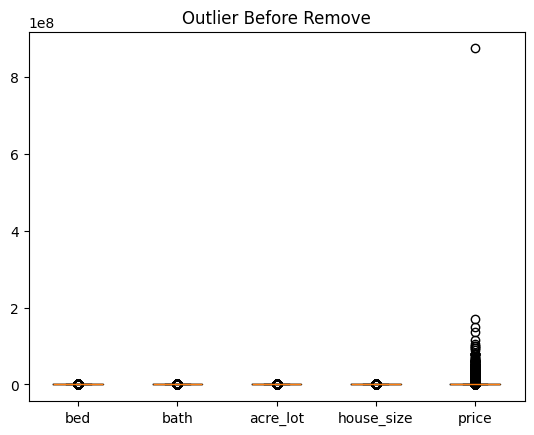

Total Row With Outlier: 658889


In [16]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier Before Remove')
plt.show()
print(f'Total Row With Outlier: {df.shape[0]}')

In [17]:
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

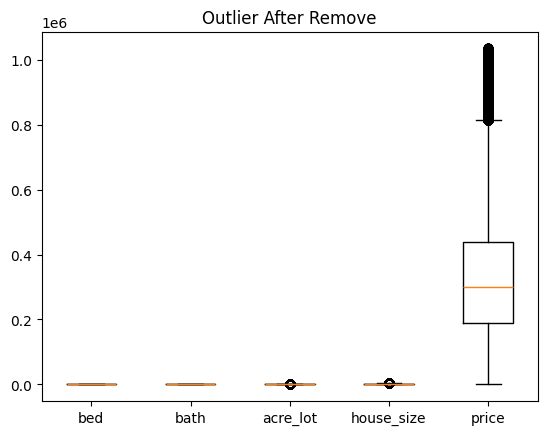

Total Row Without Outlier: 469233


In [18]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier After Remove')
plt.show()
print(f'Total Row Without Outlier: {df.shape[0]}')

In [19]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,4.692330e+05,469233.000000,469233.000000,469233.000000,469233.000000,469233.000000
mean,3.371289e+05,3.149889,2.294372,0.245000,39209.353694,1794.762941
std,1.977145e+05,0.807541,0.820956,0.154959,19470.936984,688.881922
min,0.000000e+00,2.000000,1.000000,0.000000,601.000000,100.000000
25%,1.899000e+05,3.000000,2.000000,0.150000,27858.000000,1275.000000
50%,3.000000e+05,3.000000,2.000000,0.230000,34209.000000,1674.000000
75%,4.399000e+05,4.000000,3.000000,0.270000,55116.000000,2196.000000
max,1.035500e+06,5.000000,4.000000,0.890000,95000.000000,4257.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469233 entries, 0 to 1048573
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      469233 non-null  object 
 1   price       469233 non-null  float64
 2   bed         469233 non-null  float64
 3   bath        469233 non-null  float64
 4   acre_lot    469233 non-null  float64
 5   city        469233 non-null  object 
 6   state       469233 non-null  object 
 7   zip_code    469233 non-null  float64
 8   house_size  469233 non-null  float64
dtypes: float64(6), object(3)
memory usage: 35.8+ MB


# Split Dataset

Splitting dataset into training data and testing data

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [22]:
#find out whether the column is numerical or categorical
numerical_cols = list(df._get_numeric_data().columns)
print('Numerical columns:')
print(numerical_cols)
print('')
categorical_cols = list(set(df.columns) - set(numerical_cols))
print('Categorical columns:')
print(categorical_cols)

Numerical columns:
['price', 'bed', 'bath', 'acre_lot', 'zip_code', 'house_size']

Categorical columns:
['city', 'status', 'state']


In [23]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New Hampshire', 'Vermont', 'New York',
       'Rhode Island', 'Wyoming', 'Maine', 'Georgia', 'West Virginia',
       'Pennsylvania', 'Delaware', 'Ohio', 'Maryland', 'Virginia',
       'Colorado', 'District of Columbia', 'Wisconsin', 'North Carolina',
       'South Carolina', 'Kentucky', 'Tennessee', 'Mississippi',
       'Alabama', 'Florida', 'Missouri', 'Arkansas', 'Louisiana',
       'Indiana', 'Illinois', 'Michigan', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'Texas', 'North Dakota', 'Montana',
       'Idaho', 'Kansas', 'Oklahoma', 'New Mexico'], dtype=object)

Converting categorical data into numereical data by using LabelEncoder

In [24]:
#state
le_state = LabelEncoder()
df['le_state'] = le_state.fit_transform(df['state'])
df['le_state'].unique()

array([33, 40, 17,  3, 25, 24, 39, 27, 34, 44, 15,  7, 42, 32,  4, 30, 16,
       41,  2,  5, 43, 28, 35, 13, 37, 20,  0,  6, 21,  1, 14, 10,  9, 18,
       11, 19, 36, 23, 38, 29, 22,  8, 12, 31, 26])

In [25]:
# #(Test) Log to see the state value
# df['state']
# le_state = LabelEncoder()
# le_state.fit(df['state'])
# state_mapping = dict(zip(le_state.classes_, le_state.transform(le_state.classes_)))
# df['state'] = le_state.transform(df['state'])
# print("Transformed 'state' column:")
# print(df['state'])

# print("State mapping:")
# print(state_mapping)

In [26]:
df['city'].unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Killeen',
       'Harker Heights', 'Nolanville'], shape=(11394,), dtype=object)

In [27]:
#city
le_city = LabelEncoder()
df['le_city'] = le_city.fit_transform(df['city'])
df['le_city'].unique()

array([  46, 5066, 8195, ..., 5223, 4311, 7242], shape=(11394,))

In [28]:
import json
import numpy as np

json_data = {}

for state, le_state in zip(df['state'].unique(), df['le_state'].unique()):
    cities = df[df['state'] == state]
    city_json = {}
    for city, le_city in zip(cities['city'], cities['le_city']):
        city_json[city] = le_city
    json_data[state] = {'le_state': int(le_state), 'cities': city_json}

with open('state&city.json', 'w') as f:
    json.dump(json_data, f, indent=4)

In [29]:
df.to_csv('checkState&City.csv', index=False)

Features Inlcluded in Predicitng House Prices

In [30]:
x = df.drop(['price'], axis='columns')
x = x.drop(['status', 'zip_code', 'state', 'city'], axis='columns')
y = df['price']

#splitting training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [31]:
print(x_train)

         bed  bath  acre_lot  house_size  le_state  le_city
466446   2.0   3.0      0.05      1248.0         6     7634
557514   3.0   2.0      0.14      1578.0         6     6976
722695   3.0   1.0      0.17      1272.0        10     6166
143752   4.0   2.0      0.26      1744.0        27     5787
343105   2.0   1.0      0.23      1100.0        35     9613
...      ...   ...       ...         ...       ...      ...
983751   4.0   3.0      0.35      1886.0         1     5773
287404   3.0   2.0      0.54      1552.0        28     3946
974042   3.0   3.0      0.20      1797.0        14    10922
709248   4.0   4.0      0.17      3388.0        30       66
1027826  3.0   2.0      0.23      1899.0        38     4018

[375386 rows x 6 columns]


In [32]:
x

,bed,bath,acre_lot,house_size,le_state,le_city
0,3.0,2.0,0.12,920.0,33,46
1,4.0,2.0,0.08,1527.0,33,46
2,2.0,1.0,0.15,748.0,33,5066
3,4.0,2.0,0.10,1800.0,33,8195
5,4.0,3.0,0.46,2520.0,33,9043
...,...,...,...,...,...,...
1048568,4.0,3.0,0.39,2595.0,38,4311
1048569,4.0,3.0,0.40,2629.0,38,4311
1048570,5.0,4.0,0.19,3499.0,38,4311
1048571,5.0,3.0,0.19,2572.0,38,4311


# Modelling

Shows the number of features included in the model training

In [33]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (375386, 6)
x_test shape: (93847, 6)


Model Training

In [34]:
# Functions that will help us calculate the RMSE and print the score.
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res =[rmse(m.predict(x_train),y_train),rmse(m.predict(x_test),y_test),m.score(x_train,y_train),m.score(x_test,y_test)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

Train Random Forest Model

In [35]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print_score(rf_model)

[54608.73729569031, 123981.06762925826, 0.9237257186843914, 0.6065262674361587]


Train Hybrid Regression Model

In [36]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Hybrid Regression (average of Linear Regression and Random Forest predictions)
y_pred_hybrid = (y_pred_lr + y_pred_rf) / 2
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
rmse_hybrid = math.sqrt(mse_hybrid)
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
r2_hybrid = r2_score(y_test, y_pred_hybrid)

Train Ridge Regression Model

In [37]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print_score(ridge_model)

[161592.11388627585, 161520.97393499807, 0.3321265494564156, 0.33217472642797496]


Train Decision Tree Model

In [38]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = math.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print_score(dt_model)

[19033.441230428583, 158661.88882991954, 0.990734081284888, 0.35560784919307653]


Train Gradient Boosting Model

In [39]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = math.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print_score(gb_model)

[143103.64085680884, 143084.69848144893, 0.4762123893921043, 0.47592748130164164]


# Compare y_predict price with actual price

Random Forest Model

In [40]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

print("Mean Absolute Error (MAE):", mae)
print(comparison_df)

Mean Absolute Error (MAE): 84677.5506802432
       Actual Prices  Predicted Prices
0           825000.0     811665.000000
1           639900.0     611914.484127
2           169000.0     108670.000000
3           249900.0     402450.000000
4            95000.0      99289.000000
...              ...               ...
93842       267995.0     248370.000000
93843       549900.0     658880.000000
93844       385000.0     404398.500000
93845       305000.0     378830.000000
93846       320000.0     450290.000000

[93847 rows x 2 columns]


Hybrid Regression Model

In [41]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Hybrid Regression (average of Linear Regression and Random Forest predictions)
y_pred_hybrid = (y_pred_lr + y_pred_rf) / 2
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)

comparison_df_hybrid = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred_hybrid})
comparison_df_hybrid.reset_index(drop=True, inplace=True)
print("Mean Absolute Error (MAE) for Hybrid Regression:", mae_hybrid)
print(comparison_df_hybrid)

Mean Absolute Error (MAE) for Hybrid Regression: 92666.00245781288
       Actual Prices  Predicted Prices
0           825000.0     676301.513024
1           639900.0     561128.304147
2           169000.0     199974.475047
3           249900.0     326235.656138
4            95000.0     203205.132392
...              ...               ...
93842       267995.0     283153.825198
93843       549900.0     486052.112970
93844       385000.0     337266.414543
93845       305000.0     336702.767212
93846       320000.0     439407.273666

[93847 rows x 2 columns]


Ridge Regression Model

In [42]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

comparison_df_ridge = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred_ridge})
comparison_df_ridge.reset_index(drop=True, inplace=True)
print("Mean Absolute Error (MAE) for Ridge Regression:", mae_ridge)
print(comparison_df_ridge)

Mean Absolute Error (MAE) for Ridge Regression: 118877.52663069291
       Actual Prices  Predicted Prices
0           825000.0     559930.228387
1           639900.0     498874.767662
2           169000.0     268154.487884
3           249900.0     292241.924885
4            95000.0     271505.083584
...              ...               ...
93842       267995.0     319351.754795
93843       549900.0     359399.724367
93844       385000.0     297217.106633
93845       305000.0     304477.027942
93846       320000.0     416430.096296

[93847 rows x 2 columns]


Decision Tree Model

In [43]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

print("Mean Absolute Error (MAE):", mae)
print(comparison_df)

Mean Absolute Error (MAE): 104485.7130018838
       Actual Prices  Predicted Prices
0           825000.0     750000.000000
1           639900.0     624185.714286
2           169000.0      42000.000000
3           249900.0     699900.000000
4            95000.0     237995.000000
...              ...               ...
93842       267995.0     340000.000000
93843       549900.0     535000.000000
93844       385000.0     422000.000000
93845       305000.0     339900.000000
93846       320000.0     356000.000000

[93847 rows x 2 columns]


Gradient Boosting Model

In [44]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

print("Mean Absolute Error (MAE):", mae)
print(comparison_df)

Mean Absolute Error (MAE): 104485.7130018838
       Actual Prices  Predicted Prices
0           825000.0     750000.000000
1           639900.0     624185.714286
2           169000.0      42000.000000
3           249900.0     699900.000000
4            95000.0     237995.000000
...              ...               ...
93842       267995.0     340000.000000
93843       549900.0     535000.000000
93844       385000.0     422000.000000
93845       305000.0     339900.000000
93846       320000.0     356000.000000

[93847 rows x 2 columns]


# Model Evaluation

Evaluate the model and determine which model is the best fit for the dataset

In [45]:
results = {
    'Random Forest': {'MSE': mse_rf, 'RMSE': rmse_rf, 'MAE': mae_rf, 'R^2': r2_rf},
    'Hybrid Regression': {'MSE': mse_hybrid, 'RMSE': rmse_hybrid, 'MAE': mae_hybrid, 'R^2': r2_hybrid},
    'Ridge Regression': {'MSE': mse_ridge, 'RMSE': rmse_ridge, 'MAE': mae_ridge, 'R^2': r2_ridge},
    'Decision Tree': {'MSE': mse_dt, 'RMSE': rmse_dt, 'MAE': mae_dt, 'R^2': r2_dt},
    'Gradient Boosting': {'MSE': mse_gb, 'RMSE': rmse_gb, 'MAE': mae_gb, 'R^2': r2_gb}
}

# Convert the dictionary to a DataFrame
data = pd.DataFrame.from_dict(results, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')

# Display the DataFrame
print(data)

                              MSE       RMSE        MAE   R^2
Random Forest      15371305130.49  123981.07   84677.55  0.61
Hybrid Regression  16789107930.56  129572.79   92666.00  0.57
Ridge Regression   26089025020.91  161520.97  118877.53  0.33
Decision Tree      25173594967.08  158661.89  104571.71  0.36
Gradient Boosting  20473230939.53  143084.70  104526.94  0.48


C:\Users\OEM\AppData\Local\Temp\ipykernel_5184\2661306419.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: f'{x:.2f}')


#Predict House Price with Given Input

In [46]:
x

,bed,bath,acre_lot,house_size,le_state,le_city
0,3.0,2.0,0.12,920.0,33,46
1,4.0,2.0,0.08,1527.0,33,46
2,2.0,1.0,0.15,748.0,33,5066
3,4.0,2.0,0.10,1800.0,33,8195
5,4.0,3.0,0.46,2520.0,33,9043
...,...,...,...,...,...,...
1048568,4.0,3.0,0.39,2595.0,38,4311
1048569,4.0,3.0,0.40,2629.0,38,4311
1048570,5.0,4.0,0.19,3499.0,38,4311
1048571,5.0,3.0,0.19,2572.0,38,4311


In [47]:
x = np.array([[3, 3, 0.7, 3, 10, 3852]]) #hard coded input
x

array([[3.000e+00, 3.000e+00, 7.000e-01, 3.000e+00, 1.000e+01, 3.852e+03]])

In [48]:
y_pred = rf_model.predict(x)
y_pred


c:\Users\OEM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([246876.])

#Save Trained Model

In [49]:
import pickle

In [50]:
data = {"model": rf_model, "le_state": le_state, "le_city": le_city}
with open('predict_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [51]:
with open('predict_model.pkl', 'rb') as file:
  data = pickle.load(file)

rf_model_loaded = data["model"]
le_state_loaded = data["le_state"]
le_city_loaded = data["le_city"]
# print("Number of unique State Labels:", len(le_state_loaded.classes_))
# print("Number of unique City Labels:", len(le_city_loaded.classes_))

In [52]:
y_pred = rf_model_loaded.predict(x)
y_pred

c:\Users\OEM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([246876.])

In [57]:
from joblib import dump
from sklearn.ensemble import RandomForestRegressor

# Assume rf_model is your trained RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
# Example training data (replace with your actual data)
# rf_model.fit(x_train, y_train)

# Save the model
dump(rf_model, 'predict_model.joblib')


['predict_model.joblib']

In [59]:
import pickle
x = np.array([[3, 3, 0.7, 3, 10, 3852]])

with open('predict_model.pkl', 'rb') as f:
    pmodel = pickle.load(f)

rf_model = pmodel["model"]
predictions = rf_model.predict(x)
print(predictions)

[246876.]


c:\Users\OEM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
